This notebook is based on this tutorial:

https://elitedatascience.com/imbalanced-classes

Data Source:  http://archive.ics.uci.edu/ml/datasets/balance+scale


Imbalanced classes appear in many domains, including:

- Fraud detection
- Spam filtering
- Disease screening
- SaaS subscription churn
- Advertising click-throughs

Data Description:

- 1. Title: Balance Scale Weight & Distance Database

- 2. Source Information: 
    (a) Source: Generated to model psychological experiments reported
		by Siegler, R. S. (1976).  Three Aspects of Cognitive
		Development.  Cognitive Psychology, 8, 481-520.
    (b) Donor: Tim Hume (hume@ics.uci.edu)
    (c) Date: 22 April 1994

- 3. Past Usage: (possibly different formats of this data)
   - Publications
	1. Klahr, D., & Siegler, R.S. (1978).  The Representation of
	   Children's Knowledge.  In H. W. Reese & L. P. Lipsitt (Eds.),
	   Advances in Child Development and Behavior, pp. 61-116.  New
	   York: Academic Press 
	2. Langley,P. (1987).  A General Theory of Discrimination
	   Learning.  In D. Klahr, P. Langley, & R. Neches (Eds.),
	   Production System Models of Learning and Development, pp.
	   99-161. Cambridge, MA: MIT Press
	3. Newell, A. (1990).  Unified Theories of Cognition.
	   Cambridge, MA: Harvard University Press
	4. McClelland, J.L. (1988).  Parallel Distibuted Processing:
	   Implications for Cognition and Development.  Technical
	   Report AIP-47, Department of Psychology, Carnegie-Mellon
	   University 
	5. Shultz, T., Mareschal, D., & Schmidt, W. (1994).  Modeling
	   Cognitive Development on Balance Scale Phenomena. Machine
	   Learning, Vol. 16, pp. 59-88.

- 4. Relevant Information: 
	This data set was generated to model psychological
	experimental results.  Each example is classified as having the
	balance scale tip to the right, tip to the left, or be
	balanced.  The attributes are the left weight, the left
	distance, the right weight, and the right distance.  The
	correct way to find the class is the greater of 
	(left-distance * left-weight) and (right-distance *
	right-weight).  If they are equal, it is balanced.

- 5. Number of Instances: 625 (49 balanced, 288 left, 288 right)

- 6. Number of Attributes: 4 (numeric) + class name = 5

- 7. Attribute Information:
	1. Class Name: 3 (L, B, R)
	2. Left-Weight: 5 (1, 2, 3, 4, 5)
	3. Left-Distance: 5 (1, 2, 3, 4, 5)
	4. Right-Weight: 5 (1, 2, 3, 4, 5)
	5. Right-Distance: 5 (1, 2, 3, 4, 5)

- 8. Missing Attribute Values: 
	none

- 9. Class Distribution: 
   1. 46.08 percent are L
   2. 07.84 percent are B
   3. 46.08 percent are R

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read dataset
df = pd.read_csv('../Imbalance_Data_Tutorials/balance-scale.data', 
                 names=['balance', 'var1', 'var2', 'var3', 'var4'])
 
# Display example observations
df.head()

,balance,var1,var2,var3,var4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


The dataset contains information about whether a scale is balanced or not, based on weights and distances of the two arms.

- It has 1 target variable, which we've labeled balance .
- It has 4 input features, which we've labeled var1  through var4 .

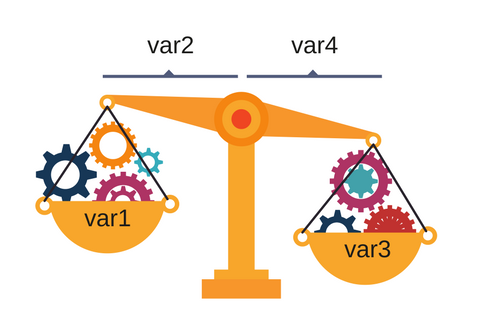

The target variable has 3 classes.

- R for right-heavy, i.e. when var3 * var4 > var1 * var2

- L for left-heavy, i.e. when var3 * var4 < var1 * var2

- B for balanced, i.e. when var3 * var4 = var1 * var2

In [3]:
df['balance'].value_counts()

R    288
L    288
B     49
Name: balance, dtype: int64

Turn the problem into binary classification problem

In [4]:
# Transform into binary classification

df['balance'] = [1 if b=='B' else 0 for b in df.balance]
 
df['balance'].value_counts(normalize = True)

0    0.9216
1    0.0784
Name: balance, dtype: float64

We ve got now highly imbalanced dataset

### The Danger of Imbalanced Classes

Now that we have a dataset, we can really show the dangers of imbalanced classes.

First, let's import the **Logistic Regression** algorithm and the accuracy metric from Scikit-Learn.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
# Separate input features (X) and target variable (y)
y = df.balance
X = df.drop('balance', axis=1)
 
# Train model
clf_imbalanced = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_imbalanced = clf_imbalanced.predict(X)

print(accuracy_score(pred_imbalanced, y) )

0.9216


/upb/users/s/ssmirnov/profiles/unix/imt/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


So our model has 92% overall accuracy, but is it because it's predicting only 1 class?

In [7]:
print(np.unique( pred_imbalanced ))

[0]


As you can see, this model is only predicting **0**, which means it's completely ignoring the minority class in favor of the majority class.

Next, we'll look at the first technique for handling imbalanced classes: up-sampling the minority class.

### 1. Up-sample Minority Class

Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

There are several heuristics for doing so, but the most common way is to simply resample with replacement.

First, we'll import the resampling module from Scikit-Learn:

In [8]:
from sklearn.utils import resample

Next, we'll create a new DataFrame with an up-sampled minority class. Here are the steps:

- First, we'll separate observations from each class into different DataFrames.
- Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.
- Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [9]:
# Separate majority and minority classes
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]

# Upsample minority class

df_minority_upsample = resample(df_minority, replace=True, n_samples=df_majority.shape[0], random_state=123)
df_minority_upsample.shape

(576, 5)

In [10]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsample])
 
# Display new class counts
df_upsampled.balance.value_counts()

1    576
0    576
Name: balance, dtype: int64

#### Now train another Logistic Regression

In [11]:
# Separate input features (X) and target variable (y)
y = df_upsampled.balance
X = df_upsampled.drop('balance', axis=1)
 
# Train model
clf_upsampled = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_upsampled = clf_upsampled.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_upsampled ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_upsampled) )

[0 1]
0.5138888888888888


Great, now the model is no longer predicting just one class. While the accuracy also took a nosedive, it's now more meaningful as a performance metric.

### 2. Down-sample Majority Class

Down-sampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.

The most common heuristic for doing so is resampling without replacement.

The process is similar to that of up-sampling. Here are the steps:

- First, we'll separate observations from each class into different DataFrames.
- Next, we'll resample the majority class without replacement, setting the number of samples to match that of the minority class.
- Finally, we'll combine the down-sampled majority class DataFrame with the original minority class DataFrame.

In [12]:
# Separate majority and minority classes
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=df_minority.shape[0],     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.balance.value_counts()

1    49
0    49
Name: balance, dtype: int64

In [13]:
# Separate input features (X) and target variable (y)
y = df_downsampled.balance
X = df_downsampled.drop('balance', axis=1)
 
# Train model
clf_downsampled = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_downsampled = clf_downsampled.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_downsampled ) )
print( accuracy_score(y, pred_y_downsampled) )

[0 1]
0.5816326530612245


The model isn't predicting just one class, and the accuracy seems higher.

We'd still want to validate the model on an unseen test dataset, but the results are more encouraging.

### 3. Change Your Performance Metric

So far, we've looked at two ways of addressing imbalanced classes by resampling the dataset. Next, we'll look at using other performance metrics for evaluating the models.

Albert Einstein once said, "if you judge a fish on its ability to climb a tree, it will live its whole life believing that it is stupid." This quote really highlights the importance of choosing the right evaluation metric.

For a general-purpose metric for classification, we recommend Area Under ROC Curve (AUROC).

We won't dive into its details in this guide, but you can read more about it here.
Intuitively, AUROC represents the likelihood of your model distinguishing observations from two classes.
In other words, if you randomly select one observation from each class, what's the probability that your model will be able to "rank" them correctly?

In [14]:
from sklearn.metrics import roc_auc_score

# Predict class probabilities
prob_y_downsampled = clf_downsampled.predict_proba(X)
 
# Keep only the positive class
prob_y_downsampled = [p[1] for p in prob_y_downsampled]
 
prob_y_downsampled[:5] # Example

[0.4541919722647967,
 0.4820596221328392,
 0.4686232706639249,
 0.4786837883268909,
 0.5814385682015961]

So how did this model (trained on the down-sampled dataset) do in terms of AUROC?

In [15]:
print(roc_auc_score(y, prob_y_downsampled))

0.5680966264056644


Ok... and how does this compare to the original model trained on the imbalanced dataset?

In [17]:
prob_y_imbalanced = clf_imbalanced.predict_proba(X)
prob_y_imbalanced = [p[1] for p in prob_y_imbalanced]
 
print( roc_auc_score(y, prob_y_imbalanced) )

0.4773011245314452


Remember, our original model trained on the imbalanced dataset had an accuracy of 92%, which is much higher than the 58% accuracy of the model trained on the down-sampled dataset.

However, the latter model has an AUROC of 57%, which is higher than the 47% of the original model.

### 4. Penalize Algorithms (Cost-Sensitive Training)

The next tactic is to use penalized learning algorithms that increase the cost of classification mistakes on the minority class.

A popular algorithm for this technique is Penalized-SVM:

In [18]:
from sklearn.svm import SVC

During training, we can use the argument **class_weight='balanced'**  to penalize mistakes on the minority class by an amount proportional to how under-represented it is.

We also want to include the argument **probability=True**  if we want to enable probability estimates for SVM algorithms.

Let's train a model using Penalized-SVM on the original imbalanced dataset:

In [19]:
# Separate input features (X) and target variable (y)
y = df.balance
X = df.drop('balance', axis=1)
 
# Train model
clf_SVM = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
 
clf_SVM.fit(X, y)
 
# Predict on training set
pred_y_SVM = clf_SVM.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_SVM ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_SVM) )
# 0.688
 
# What about AUROC?
prob_y_SVM = clf_SVM.predict_proba(X)
prob_y_SVM = [p[1] for p in prob_y_SVM]
print( roc_auc_score(y, prob_y_SVM) )

[0 1]
0.688
0.46947633219954643


Again, our purpose here is only to illustrate this technique. To really determine which of these tactics works best for this problem, you'd want to evaluate the models on a hold-out test set.

### 5. Use Tree-Based Algorithms

The final tactic we'll consider is using tree-based algorithms. Decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes.

In modern applied machine learning, tree ensembles (Random Forests, Gradient Boosted Trees, etc.) almost always outperform singular decision trees, so we'll jump right into those:



In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Separate input features (X) and target variable (y)
y = df.balance
X = df.drop('balance', axis=1)
 
# Train model
clf_Tree = RandomForestClassifier()
clf_Tree.fit(X, y)
 
# Predict on training set
pred_y_Tree = clf_Tree.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_Tree ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_Tree) )
# 0.9744
 
# What about AUROC?
prob_y_Tree = clf_Tree.predict_proba(X)
prob_y_Tree = [p[1] for p in prob_y_Tree]
print( roc_auc_score(y, prob_y_Tree) )

[0 1]
0.984
0.9991673752834467


/upb/users/s/ssmirnov/profiles/unix/imt/.local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wow! 97% accuracy and nearly 100% AUROC? Is this magic? A sleight of hand? Cheating? Too good to be true?

Well, tree ensembles have become very popular because they perform extremely well on many real-world problems. We certainly recommend them wholeheartedly.

#### However:

While these results are encouraging, the model could be overfit, so you should still evaluate your model on an unseen test set before making the final decision.

Note: your numbers may differ slightly due to the randomness in the algorithm. You can set a random seed for reproducible results.

### Honorable Mentions

There were a few tactics that didn't make it into this tutorial:

- **Create Synthetic Samples (Data Augmentation)**

Creating synthetic samples is a close cousin of up-sampling, and some people might categorize them together. For example, the SMOTE algorithm is a method of resampling from the minority class while slightly perturbing feature values, thereby creating "new" samples.

You can find an implementation of SMOTE in the imblearn library.

- **Combine Minority Classes**

Combining minority classes of your target variable may be appropriate for some multi-class problems.

For example, let's say you wished to predict credit card fraud. In your dataset, each method of fraud may be labeled separately, but you might not care about distinguishing them. You could combine them all into a single 'Fraud' class and treat the problem as binary classification.

- **Reframe as Anomaly Detection**

Anomaly detection, a.k.a. outlier detection, is for detecting outliers and rare events. Instead of building a classification model, you'd have a "profile" of a normal observation. If a new observation strays too far from that "normal profile," it would be flagged as an anomaly.